# Integrating PetThermoTools results with Thermobar

- Users may want to investigate the results of their models using the functions involved in Thermobar for the calculation, and plotting of mineral components.
- Results of PetThermoTools simulations integrate with the Thermobar code without any further data processing required.

**Before any calculations can be run** users need to download the alphaMELTS for MATLAB files (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/) and store them locally on their computer. These files then need to be added to the Python path by using the $sys.path.append()$ command below.

Data used in the calculations below can be downloaded from here: https://github.com/gleesonm1/PetThermoTools/blob/master/docs/Examples/CrystallisationTests/Fernandina_glass.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PetThermoTools as M

import sys
sys.path.append(r"MELTS")

First, we'll load in some matrix glass and melt inclusion data from Isla Fernandina in the Galapagos Achipelago and perform a simple fractional crystallization model starting from the most MgO-rich composition in the dataset.

In [2]:
df = pd.read_excel('Fernandina_glass.xlsx')
df = df.fillna(0)
df= df.sort_values('MgO', ascending = False, ignore_index = True)
comp = df.loc[0]

Now we can use the defined starting composition to perform a simple fractional crystallization model using the following code:

In [3]:
Results = M.isobaric_crystallisation(bulk = comp,
                                    Model = "MELTSv1.2.0",
                                    find_liquidus = True,
                                    P_bar = 2000,
                                    T_end_C = 1050,
                                    dt_C = 2,
                                    fO2_buffer = "FMQ",
                                    Frac_solid = True,
                                    Frac_fluid = True,
                                    H2O_Liq = 0.6)

Running MELTSv1.2.0 calculation... Complete (time taken = 42.23 seconds)

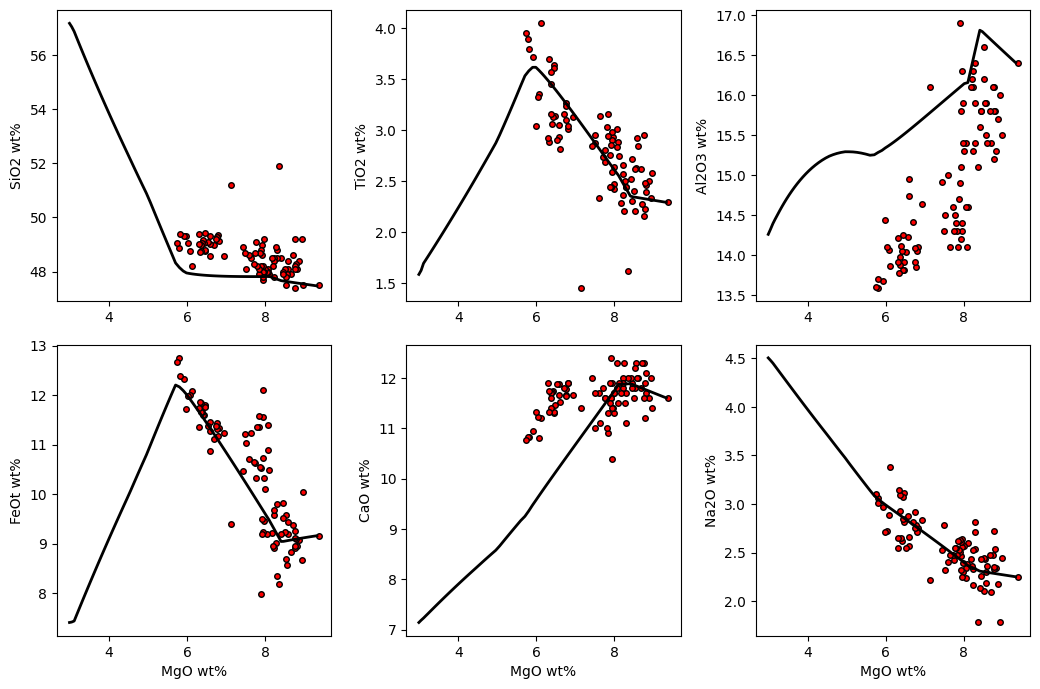

In [4]:
M.harker(Results = Results, data = df)

C:\Users\Matt Gleeson\AppData\Roaming\Python\Python39\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


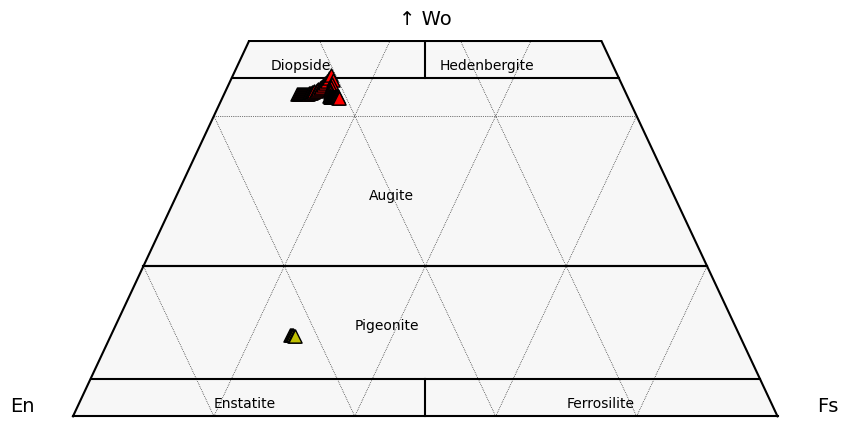

In [5]:
import Thermobar as pt

cpx_comps_tern_1 = pt.tern_points_px(px_comps = Results['clinopyroxene1'])
if "clinopyroxene2" in Results.keys():
    Cpx2 = Results['clinopyroxene2'].copy()
    Cpx2.columns = Cpx2.columns.str.replace('_Cpx2', '_Cpx')
    
    cpx_comps_tern_2 = pt.tern_points_px(px_comps = Cpx2)

f, tax = pt.plot_px_classification(figsize = (10,5),
                                    major_grid = True,
                                    labels = True)

tax.scatter(cpx_comps_tern_1,
            edgecolor = 'k',
            marker = '^',
            facecolor = 'r',
            s = 90)

if "clinopyroxene2" in Results.keys():
    tax.scatter(cpx_comps_tern_2,
            edgecolor = 'k',
            marker = '^',
            facecolor = 'y',
            s = 90)